# Imports and preprocess

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

working_path = "/content/drive/My Drive/data_science_basics/machine_learning_dataset/"
!dir "/content/drive/My Drive/data_science_basics/machine_learning_dataset/"

column_2C_weka.csv  column_3C_weka.csv


In [0]:
data = pd.read_csv(working_path + 'column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Supervised learning
- Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels normal and abnormal.
-- There are features and targets. Features are values which we use as parameters to calculate our predictions. Targets/predictions are values or categories we guess/predict.
-- Aim is that as given features(input) predict whether target variable(output) is normal or abnormal in this case
-- Classification: target variable consists of categories like normal or abnormal
-- Regression: target variable is continious like stock market

## EXPLORATORY DATA ANALYSIS (EDA)
- In order to work with data, firstly we need to explore it
- Usually it starts with head() method to see features and target values
- Then it is common to question yourself if there is some NaN values and length of data. We can explore it using info() method
- Then is a good practice to check distribution of our features - basic statistics to make sure for example that one feature mean is relatively close to other, not like mean1() = 0.01 and other feature mean2() = 1000. We can explore it with describe method()
- Also is a good practice to plot our data - pd.plotting.scatter_matrix:
-- green: normal and red: abnormal
-- c: color
-- figsize: figure size
-- diagonal: histohram of each features
-- alpha: opacity
-- s: size of marker
-- marker: marker type
 

In [0]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [0]:
data.info()

"""
As we can see we have 310 entries, features values are float type and our target is object type like string
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [0]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


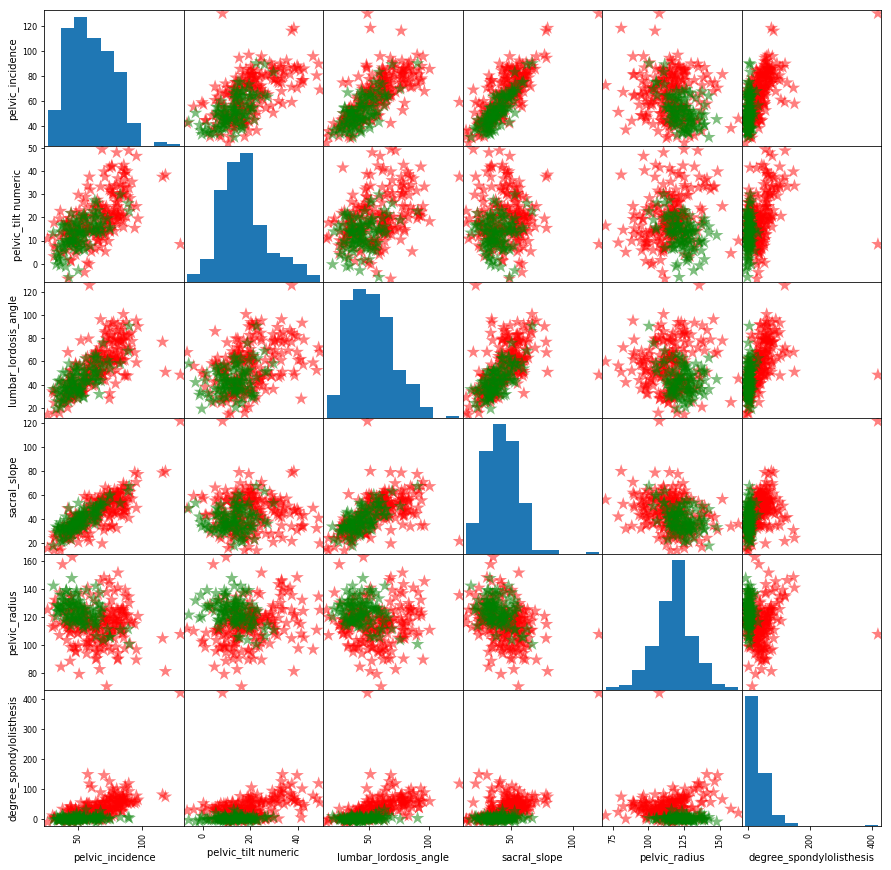

In [0]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:, 'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns!='class'], figsize=[15,15], diagonal='hist', c=color_list, alpha=0.5, s = 200, marker='*')
plt.show()

How many values has each class?

In [0]:
data.loc[:, 'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

The same with seaborn plots

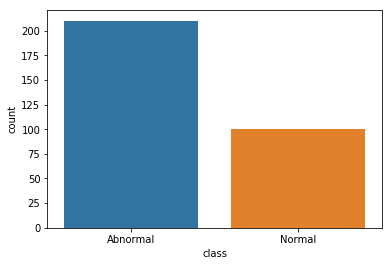

In [0]:
sns.countplot(x='class', data=data)

## KNN - K nearest neighbours
- KNN looks for K closest labeled point
- Classification method
- Firstly we need to train/fit our data
- fit(): trains our data
- predict(): predicts the data
- x: our data features
- y: target values - labels (normal or abnormal in this case)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv(working_path + 'column_2C_weka.csv')
display(data.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [0]:
x = data.loc[:, data.columns!='class']
y = data.loc[:, 'class']

knn = KNeighborsClassifier(n_neighbors=3)
# training model on all the data
knn.fit(X=x, y=y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# adding aditional row in the end to use it dor prediction
data = data.append({'pelvic_incidence' : 38, "pelvic_tilt numeric": 50, "lumbar_lordosis_angle":100, "sacral_slope": 60, "pelvic_radius":150, "degree_spondylolisthesis":-2, "class": "Abnormal"}, ignore_index=True)
display(data.tail())
to_predict = data.loc[310:, data.columns!='class']
print('Predict row')
display(to_predict)


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal
310,38.000000,50.000000,100.000000,60.000000,150.000000,-2.000000,Abnormal


Predict row


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
310,38.0,50.0,100.0,60.0,150.0,-2.0


In [0]:
# predicting label of our added row from its features
predictions = knn.predict(to_predict)
print('Predictions are: ', predictions)

Predictions are:  ['Normal']


In [0]:
# dropping last added row for further operations
data = data.drop(310)
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [0]:
predict_all = data.loc[:, data.columns!='class']
predictions = knn.predict(predict_all)
print('Predictions are: ', predictions)

Predictions are:  ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnorma

As we can see we trained on all the data and after that predicted on the same data.  
It makes no sense doing that so we need to separate our data and train on training data part and keep test data part outside the training procedure.  
Therefore we need to split our data train and test sets.
- train: use train set by fitting
- test: make prediction on test set
- with train and test sets, fitted data and tested data are completely different
- train_test_split(x, y, test_size=0.3, random_state=1)
- - x: features
- - y: target variables/labels(normal, abnormal)
- - test_size: percentage of test set
- - random_state: sets a seed. If this number each time is the same, then train_test_split() splits data exact the same way
- fit(x_train, y_train): fits on training data
- score(x_test, y_test): predicts on test set and gives accuracy on test set



In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)

x = data.loc[:, data.columns!='class']
y = data.loc[:, data.columns=='class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
knn.fit(x_train, y_train)
scores = knn.score(x_test, y_test)
predictions = knn.predict(x_test)
print('Score is: ', scores)
print('Predictions are: ', predictions)

Score is:  0.8602150537634409
Predictions are:  ['Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Is 86% accuracy is good enought? Maybe if would choose other K value it would give us better performance. Lets try it out!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

<function matplotlib.pyplot.show>

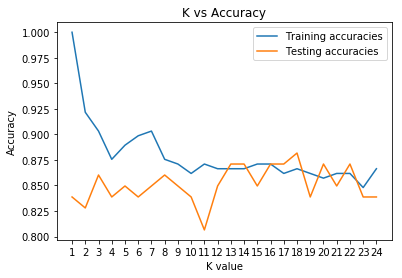

In [0]:
train_accuracies = []
test_accuracies = []
K_values = np.arange(1,25)

for i in K_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  train_accuracy = knn.score(x_train, y_train)
  test_accuracy = knn.score(x_test, y_test)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

plt.plot(K_values, train_accuracies, label='Training accuracies')
plt.plot(K_values, test_accuracies, label='Testing accuracies')
plt.legend()
plt.title('K vs Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(K_values)
plt.show

In [0]:
print('Best accuracy is {} at K={}'.format(np.max(test_accuracies), 1+test_accuracies.index(np.max(test_accuracies))))

Best accuracy is 0.8817204301075269 at K=18


As we can see best accuracy is when K=18, alse we can notice that when K=1, then we probably overfit our training data (always finding the same point to what we want to find neighbours)

## Random forest

In [0]:
# importing random forest classifier and method to split our data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv(working_path + 'column_2C_weka.csv')
display(data.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


As we can see using 5 decision trees in our random forest model we reached 82% accuracy on test set. Obiously training accuracy is really high because our model memorized that part or data and for him it's easy to overfit it. Later we'll try to play with hyperparameter tuning - tune number of trees and max_depth which is number of layers(leaves) in single decision trees. If max_depth=None, then depth is equal the number of features we have - classify based on all the features bby asking questions for all the features( is it higher or smaller than feature1 value, is it higher or smaller than feature2 value and so on...)

In [0]:
# build our random forest model: n_estimators = number of decision trees in our random forest model, criterion = method how our threshold values 
# of each feature will be calcuated (is pelvic_tilt>threshold for example)?

random_forest = RandomForestClassifier(n_estimators=5, criterion='gini', max_depth=10, random_state=1)
x = data.loc[:, data.columns!='class']
y = data.loc[:, data.columns=='class']

display(x.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

random_forest.fit(x_train, y_train)
test_score = random_forest.score(x_test, y_test)
train_score = random_forest.score(x_train, y_train)

print('Training accuracy: ', train_score)
print('Testing accuracy: ', test_score)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


Training accuracy:  0.9861751152073732
Testing accuracy:  0.8279569892473119


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Now lets play with hyperparameters n_estimators and max_depth to find out best of them and for reaching better performance!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/loc


Best training accuracy = 1.0 is when n_estimators = 25
Best testing accuracy = 0.8602150537634409 is when n_estimators = 15


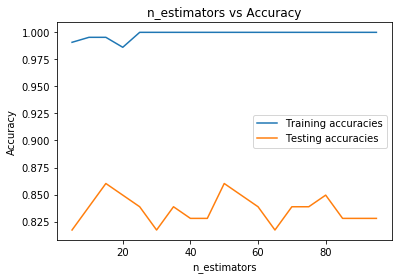

In [0]:
# create arrays of hyperparameter values to try
n_estimators = np.arange(5, 100, 5)
max_depth = np.arange(1, 30, 1)

train_accuracies = []
test_accuracies = []

for i in n_estimators:
  random_forest = RandomForestClassifier(n_estimators=i)
  random_forest.fit(x_train, y_train)
  train_accuracy = random_forest.score(x_train, y_train)
  test_accuracy = random_forest.score(x_test, y_test)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
 
plt.plot(n_estimators, train_accuracies, label='Training accuracies')
plt.plot(n_estimators, test_accuracies, label='Testing accuracies')
plt.legend()
plt.title('n_estimators vs Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
# plt.xticks(n_estimators)
plt.show
print("")
print('Best training accuracy = {} is when n_estimators = {}'.format(np.max(train_accuracies), (1+train_accuracies.index(np.max(train_accuracies)))*5 ))
print('Best testing accuracy = {} is when n_estimators = {}'.format(np.max(test_accuracies), (1+test_accuracies.index(np.max(test_accuracies)))*5 ))

## Regression
For regression part we'll use only two features:
- pelvic_incidence: feature 
- sacral_slope: target/label

### Linear regression

In [0]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data = pd.read_csv(working_path + 'column_2C_weka.csv')
print("Data")
display(data.head())

data1 = data[data['class'] =='Abnormal']
x = data1.loc[:, data.columns=='pelvic_incidence']
y = data1.loc[:, data.columns=='sacral_slope']

print('x shape is {}'.format(x.shape))
display(x.head())

Data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


x shape is (210, 1)


,pelvic_incidence
0,63.027818
1,39.056951
2,68.832021
3,69.297008
4,49.712859


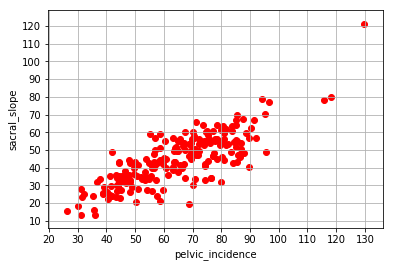

In [0]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0,140,10))
ax.set_yticks(np.arange(0, 140, 10))
plt.scatter(x, y, label='sacral_slope', color='red')
plt.grid()
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Lets build linear regression!

R^2 score reached is 0.6458410481075871


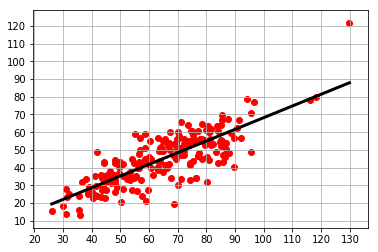

In [0]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x, y)
line = np.linspace(x.min(), x.max())

predictions = linear_model.predict(line)
score = linear_model.score(x, y)

print('R^2 score reached is {}'.format(score))

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0,140,10))
ax.set_yticks(np.arange(0,140,10))
plt.scatter(x, y, label='sacral_slope', color='red')
plt.plot(line, predictions, color='black', linewidth=3)
plt.grid()
plt.show()

### Cross-validating
We have already noticed that using all data to train isnt best idea because we do not have any data left for testing. So we need to split data, lets say 70/30. But what if our 70 percent of data differs a lot from the rest of 30%? What if the best idea would be for testing set to use block from the whole data somehere in the middle - 40 training + 30 testing + 30 training, or lets say 10% training + 30% testing + 60% training. We dont know which block of the whole data use for testing so would be a good idea to split our data in lets say 10 folds/blocks and try all different training and test set variations and keep tracking of model performance. It's called Cross validation method. Let's implement it!

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

data = pd.read_csv(working_path + 'column_2C_weka.csv')
print('Data')
display(data.head())

x = data.loc[:, data.columns=='pelvic_incidence']
y = data.loc[:, data.columns=='sacral_slope']

print('x shape is {}'.format(x.shape))
display(x.head())

Data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


x shape is (310, 1)


,pelvic_incidence
0,63.027818
1,39.056951
2,68.832021
3,69.297008
4,49.712859


As we can see below mean R^2 score is around 0.41 - value how much our data away from our predicted line (thats why it calls - linear regression). Its way lower than before because the main difference between what we did when implement linear regression without cross validation and with cross validation is that before we used whole data to train the model and then tested the model using "score = linear_model.score(x, y)" on the whole data as well. We got really high results because of that. Now we used cross validation so this way we asked model to test on data it did not see - performace automatically drops but it more accurate measurement. 

In [0]:
folds = 5
linear_regression = LinearRegression()
scores = cross_val_score(linear_regression, x, y, cv = folds)

print('R^2 scores for each fold are: {}'.format(scores))
print('Mean of all R^2 scores is: ', np.mean(scores) )

R^2 scores for each fold are: [0.02827495 0.50977686 0.36780416 0.59740705 0.55938911]
Mean of all R^2 scores is:  0.41253042676812085


### Regularized linear regression
As with KNN using K=1 with logistic regression for model it is simple to overfit the data - to memorize too well our training data and in this way do a poor performance on data it have not seen yet. It happens that model starts to think that one features are more important than others so it gives them larger coeficients in formula such as y = b*x1 + c*x2 + d*x3 + ... for example. To address this problem different regularization methods are used to penalize these coeficients b, c, d, ... 

- Ridge/L2 regularization: loss = error + alpha*sum(parameters^2)
-- Alpha is hyperparameter that we need to choose for best performace - hyperparameter tuning
-- When alpha=0 then its simple linear regression without regularization
-- If alpha is too small then it could cause the overfitting
-- If alpha is too large then our regularization parameter gives too high penalties for our features and could cause for high bias - underfitting  

- Lasso/L1 regularization: loss = error + alpha*(absolute_value(parameters)
-- Can be used to select important features on the data. Because features which values are not shrinked to zero is choosen by L1



In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

data = pd.read_csv(working_path + 'column_2C_weka.csv')
print('Data')
display(data.head())

x = data.loc[:, data.columns=='pelvic_incidence']
y = data.loc[:, data.columns=='sacral_slope']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)
print('x_train')
display(x_train.head())

Data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


x_train


,pelvic_incidence
282,53.683380
270,51.311771
239,56.447026
71,86.900794
286,61.734875


In [0]:
# With regularization L2
ridge_regression = Ridge(alpha=0.1, normalize=True, random_state=2)
ridge_regression.fit(x_train, y_train)
ridge_score = ridge_regression.score(x_test, y_test)
print('Ridge regression score: ', ridge_score)

# With regularization L1
lasso_regression = Lasso(alpha=0.1, normalize=True, random_state=2)
lasso_regression.fit(x_train, y_train)
lasso_score = lasso_regression.score(x_test, y_test)
print('Lasso regression score: ', lasso_score)

# Without regularization
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(x_train, y_train)
linear_score = linear_regression.score(x_test, y_test)
print('Linear regression score: ', linear_score)

Ridge regression score:  0.5414943511919467
Lasso regression score:  0.5437963791861748
Linear regression score:  0.5265845819166715


As we mentioned above Lasso regression (L1) could be used to select most  
important features so we'll add additional features to x to try it out.  
Then we can check coeficients in the equation for each feature and make assumptions  
based on that - the higher coeficient the more important feature is for better fit the data.

In [0]:
x = data.loc[:, ['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
display(x.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,pelvic_radius
0,63.027818,22.552586,39.609117,98.672917
1,39.056951,10.060991,25.015378,114.405425
2,68.832021,22.218482,50.092194,105.985135
3,69.297008,24.652878,44.311238,101.868495
4,49.712859,9.652075,28.317406,108.168725


As we can see  below largests coeficients (absolute values) are for the first feature  which is pelvic_incidence  
and for the second pelvic_tilt numeric. They matters   most to fit the data best.

In [0]:
lasso_regression_1 = Lasso(alpha=0.1, normalize=True)
lasso_regression_1.fit(x_train, y_train)
lasso_score_1 = lasso_regression_1.score(x_test, y_test)
print('Lasso regression score when added more features (4) is: ', lasso_score_1)
print('Lasso regression coeficients: ', lasso_regression_1.coef_)

print("")

ridge_regression_1 = Ridge(alpha=0.1, normalize=True)
ridge_regression_1.fit(x_train, y_train)
ridge_score_1 = ridge_regression_1.score(x_test, y_test)
print('Ridge regression score when added more features (4) is: ', ridge_score_1)
print('Ridge regression coeficients: ', ridge_regression_1.coef_)

Lasso regression score when added more features (4) is:  0.9475131762267749
Lasso regression coeficients:  [ 0.78871404 -0.63207433  0.         -0.        ]

Ridge regression score when added more features (4) is:  0.9708226943661012
Ridge regression coeficients:  [[ 0.75740462 -0.74155916  0.08833207 -0.0751124 ]]


### Logistic regression

**Check Evaluate metrics - confusion matrix section first!** 


*   Logistic's regression output is a probability
*   If probability is higher than 0.5 then example is labeled as 1(abnormal) or 0(normal)
*   By default logistics regression threshold is 0.5
*   ROC - receiver operation characteristics. 
*   If the curve of ROC of one classification method like logistic regression is higher than another ROC curve  
like RandomForest than it tells that logistic regression classifier doing better and we should choose that
*   x axis - false positive rate, y axis - true positive rate
*   ROC curve is used for example when using logistic regression and we do not know which threshold value to pick  
We can try bunch of them and check eachs confusion matrixes but it wont be really clear so ROC represents all the  
confusion matrixes for each threshold values. The higher in left it is, the better performance model doing with that  
threshold value.
*   Auc is are under curve - it simply represents model performance. The goal is plot to be 1, as higher as possible. 
*   fpr - false positive rate
*   tps - true positive rate



In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv(working_path + 'column_2C_weka.csv')
display(data.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [0]:
# logistic regression works with categorical data so we'll add column with 1 values where class=='Abnormal' and 0 where class=='Normal'

data['class_binary'] = [1 if i=='Abnormal' else 0 for i in data.loc[:, 'class']]
x = data.loc[:, (data.columns!='class') & (data.columns!='class_binary')]
y = data.loc[:, data.columns=='class_binary']
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class_binary
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1


Logistic regression ROC

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# taking only first column of y_pred because predict_proba() returns (n_examples, n_classes) size array where 
# each row is example and columns represents a class, so (1,1) tells probability of positive for 1st example, (1,2)
# tells probability of negative for 1st example and so on... We'll use only positive guessing for further to generate
# false positive rate and true positive rate to plot ROC curve
y_pred = log_reg.predict_proba(x_test)[:,1]
fpr_log, tpr_log, threshold = roc_curve(y_test, y_pred)
auc_log = round(auc(fpr_log, tpr_log), 3)

print('y_test')
display(y_test.head())
print('Auc: ', auc_log)

y_test


,class_binary
289,0
9,1
57,1
60,1
25,1


Auc:  0.921


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForest ROC

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_pred)
auc_rf = round(auc(fpr_rf, tpr_rf), 3)

print('y_test')
display(y_test.head())
print('Auc: ', auc_rf)

y_test


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


,class_binary
289,0
9,1
57,1
60,1
25,1


Auc:  0.908


As we can see its not clear which model doing better by looking only on ROC curves. To adress that we'll calculate   
ROC score which is area under curve - AUC. Closer auc value is to 1 the better model is doing.  
From AUC values we can do a conclusion that in general logistic regression doing slightly better performance than RandomForest classifier


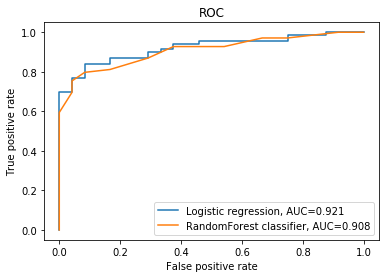

In [0]:
plt.figure()
# plt.plot([0,1], [0,1])
plt.plot(fpr_log, tpr_log, label='Logistic regression, AUC={}'.format(auc_log))
plt.plot(fpr_rf, tpr_rf, label='RandomForest classifier, AUC={}'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend()
plt.show()

## Evaluate metrics - confusion matrix
So what's about accuracy? Is it a good idea to use score to evaluate  
how precise our model is? Let's imagine that we have 95% of normal  
and 5% of abnormal exampler. Then by guessing 100% normal for  all  
examples we'll get 95% accuracy all the time by using  
just simple score - accuracy metric. We'll misslabel all abnormal  exampler.  
This is a common idea when our dataset is unbalanced. Therefore we need  
to use confusion matrix as a model measurement  metric in imbalanced data.  
While using confusion matric lets use Random forest classifier. 


*   tp: true positive - prediction is positive(normal) and actual is positive(normal)
*   tn: true negative - prediction is negative(abnormal) and actual is negative(abnormal)
*   fp: false positive - prediction is positive(normal) and actual is negative(abnormal)
*   fn: false negative - prediction is negative(abnormal) and actual is positive(normal)
*   precision = tp/(tp+fp) - good_guesses_of_positive/all_guesses_of_positive - tells propotion of positive results that are correctly classified
*   recall = tp/(tp+fn) - good_guesses_of_positive/all_positive_examples
*   f1 = 2*precision*recall/(precision+recall)
*   Confusion matrix: tp, tn, fp, fn information




In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv(working_path + 'column_2C_weka.csv')

x = data.loc[:, data.columns!='class']
y = data.loc[:, data.columns=='class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=15, random_state=4)
rf.fit(x_train, y_train)
rf_score = rf.score(x_test, y_test)
print('Random forest score: ', rf_score)

print("")

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

print("")

cr = classification_report(y_test, y_pred)
print("Classification report: \n", cr)


Random forest score:  0.8494623655913979

Confusion matrix: 
 [[57  9]
 [ 5 22]]

Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.92      0.86      0.89        66
      Normal       0.71      0.81      0.76        27

    accuracy                           0.85        93
   macro avg       0.81      0.84      0.82        93
weighted avg       0.86      0.85      0.85        93



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Lets visualize confusion matrix with seaborn

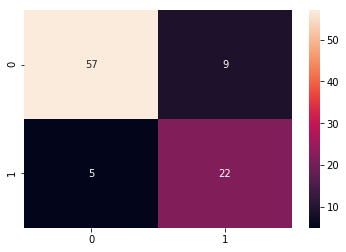

In [0]:
sns.heatmap(cm, annot=True)
plt.show()

## Hyperparameter tuning
There are some parameters that is not clear which values to choose from the very beginning. For example:


*   k in KNN
*   alpha in Ridge or Lasso regressions
*   n_estimators, max_depth.. in RandomForestClassifier

The process of hyperparameter tuning is:


*   try all the different combinations of hyperparameters
*   fit the model with all of them
*   measure prediction performance 
*   check how well model performs with each set of them
*   choose the best performance showing hyperparameter set

Lets tune hyperparameter k in KNN using cross validation.  
Ofcaurse we can do it by ourselves - keep track of the performance  
of the model using different k value on each cross validation folds  
but also we can use prebuild methods like GridSearchCV() which takes  
as parameters: model, parameter_to_tune, num_folds.  



1.   Prepare data - remember that if we are using cross validation then we dont need to split data.  
The whole cross validation idea is to avoid uncertancy how we should split data so it tries different folds for training and testing itself
2.   Create model (KNN, Logistic regression)
3.   Create hyperparameter values dictionary
4.   Create GridSearchCV() instance which takes model, hyperparameter_list, n_folds 
5.   Train/fit GridSearchCV()
6.   Check best parameters and score with them using model.best_params_ and model.best_score_






### One Hyperparameter tuning using cross validation on KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

data = pd.read_csv(working_path + 'column_2C_weka.csv')
data['class_binary'] = [1 if i=='Abnormal' else 0 for i in data.loc[:, 'class']]
x = data.loc[:, (data.columns!='class') & (data.columns!='class_binary')]
y = data.loc[:, data.columns=='class_binary']
display(data.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class_binary
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1


In [0]:
knn = KNeighborsClassifier()
# dont know why but need to specify dictionaries intries name exactly 'n_neighbors' otherwise it wont work
grid = {'n_neighbors': np.arange(1,50)}
knn_cv = GridSearchCV(knn, grid, cv=3)
knn_cv.fit(x, y)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print("Best k value is: ", knn_cv.best_params_)
print("Best score is: ", knn_cv.best_score_)

Best k value is:  {'n_neighbors': 4}
Best score is:  0.7548387096774194


### Two hyperparameters tuning using cross validation on Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

data = pd.read_csv(working_path + 'column_2C_weka.csv')
data['class_binary'] = [1 if i=='Abnormal' else 0 for i in data.loc[:, 'class']]
x = data.loc[:, (data.columns!='class') & (data.columns!='class_binary')]
y = data.loc[:, data.columns=='class_binary']
display(data.head())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class_binary
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1


In [0]:
lr = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'], 'C': np.logspace(-3,3,7)}
lr_cv = GridSearchCV(lr, param_grid, cv=3)
lr_cv.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print('Best hyperparameters are: ', lr_cv.best_params_)
print('Best score acheaved is: ', lr_cv.best_score_)

Best hyperparameters are:  {'C': 100.0, 'penalty': 'l2'}
Best score acheaved is:  0.7387096774193549


## Preprocess data


*   Turning data into numerical type - pd.get_dummies(df)
*   Normalizing data, pipeline using



#### pd.get_dummies(df)

In [0]:
data = pd.read_csv(working_path + 'column_2C_weka.csv')
print('Data')
display(data.head())

# creating dataframe where all the entries are numerical type
df = pd.get_dummies(data)
print('\n Df')
display(df.head())

# dropping one of the class columns because its dublicating (if Abnormal, then class_Abnormal=1, else class_Abnormal=0)
df.drop('class_Normal', axis=1, inplace=True)
display(df.head())

Data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal



 Df


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


#### Pipelines
The purpose of the pipeline is to assemble several steps that can be  
cross-validated together while setting different parameters.  
For this, it enables setting parameters of the various steps using their  
names and the parameter name separated by a '__', as in the example below  

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)

parameters = {'SVM__C' : [1, 10, 100], 'SVM__gamma': [0.1, 0.01]}

cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
cv.fit(x_train, y_train)

print('Accuracy: ', cv.score(x_test, y_test))
print('Best parameters: ', cv.best_params_)

Accuracy:  0.8548387096774194
Best parameters:  {'SVM__C': 100, 'SVM__gamma': 0.01}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Unsupervised learning


*   Uses data that has unlabeled or uncovered patterns.  
For example ortopedic patients data but without labels Normal and Abnormal
*   We'll use the same data set with orthopedic entries just will drop  
labels Normal and Abnormal and will use two features to represent data



## K means


*   Algorithm works iteratively to assign each data point to K clusters  
based on the features that are provided. 
*   Kmeans(n_clusters=2) means to cluster all data into two clusters



In [0]:
data = pd.read_csv(working_path + 'column_2C_weka.csv')
print('Data')
display(data.head())

data2 = pd.get_dummies(data)
print('Dummies data')
display(data2.head())

Data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Dummies data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0


In [0]:
data_kmeans = data.loc[:, ['pelvic_radius', 'degree_spondylolisthesis']]
display(data_kmeans.head())

,pelvic_radius,degree_spondylolisthesis
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501


In [0]:
# Kmeans model with two clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1, n_init=100)
kmeans.fit(data_kmeans)
labels = kmeans.predict(data_kmeans)

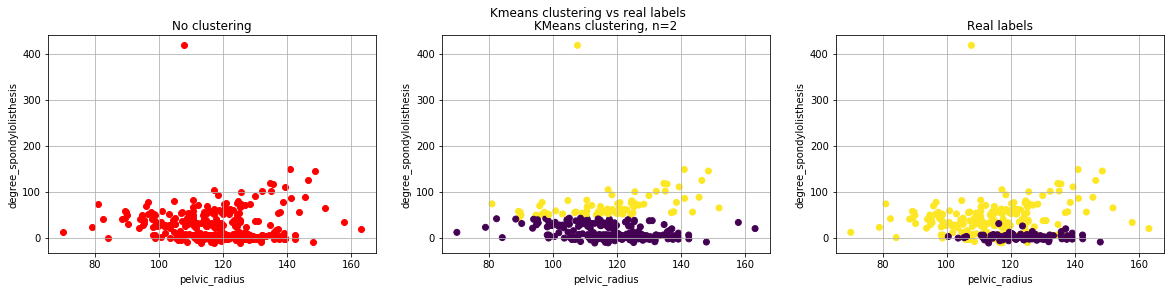

In [0]:
# plotting
fig, axs = plt.subplots(1, 3)

axs[0].scatter(data['pelvic_radius'], data['degree_spondylolisthesis'], c='red')
axs[0].set_title('No clustering')
axs[0].set_xlabel('pelvic_radius')
axs[0].set_ylabel('degree_spondylolisthesis')
axs[0].grid()

axs[1].scatter(data_kmeans['pelvic_radius'], data_kmeans['degree_spondylolisthesis'], c=labels)
axs[1].set_title('KMeans clustering, n=2')
axs[1].set_xlabel('pelvic_radius')
axs[1].set_ylabel('degree_spondylolisthesis')
axs[1].grid()

axs[2].scatter(data2['pelvic_radius'], data2['degree_spondylolisthesis'], c=data2['class_Abnormal'])
axs[2].set_title('Real labels')
axs[2].set_xlabel('pelvic_radius')
axs[2].set_ylabel('degree_spondylolisthesis')
axs[2].grid()

fig.suptitle('Kmeans clustering vs real labels')
fig.set_figwidth(20)
                  
plt.show()

### Evaluating clustering
How can we know that our model clusters data well? For this we need to evaluate performance model is doing.  
We can create crosstable to check how well it is - with crosstab we are checking how our data correlates.  
So our kmeans modek with n_clusters=2 clusters 138+100=238 as cluster 0 and 72 as cluster 1 when in reality there are 210 and 100 clusters.

In [0]:
df = pd.DataFrame({'labels':labels,"class":data['class']})
cross_tab = pd.crosstab(df['labels'], df['class'])
print('Dataframe')
display(df.head())
print('\n Crosstable')
display(cross_tab)

Dataframe


,labels,class
0,0,Abnormal
1,0,Abnormal
2,0,Abnormal
3,0,Abnormal
4,0,Abnormal



 Crosstable


class,Abnormal,Normal
labels,,
0,138,100
1,72,0


What if we do not know how many classes there are in unlabeled data?  
One method to validate the number of clusters is the elbow method.  
The idea of the elbow method is to run k-means clustering on the dataset  
for a range of values of k (say, k from 1 to 10 in the examples above),  
and for each value of k calculate the sum of squared errors (SSE) - sum of square distance from  
each cluster point to cluster mean value. It is obvious that when k is large, then  
each cluster is smaller and points of that cluster are spread less from it's mean point  
but we need to choose k value where points are spread not too much but also not to less to  
keep in mind that we do not want to cluster our datapoints to too much of clusters and in extreme  
ways that n_clusters=n_examples. In this case SSE==0. To chech SSE value we can call model.inertia_  

So from the results we've got we can say that n_cluster=4 or 5 would be good to choose (elbow points)

[]

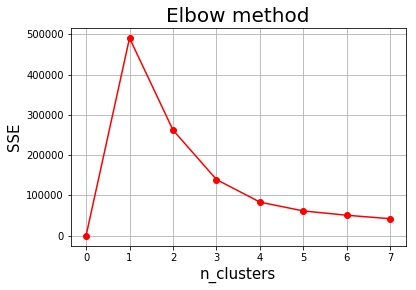

In [0]:
SSE = np.empty(8)
for i in range(1,8):
  kmeans = KMeans(n_clusters=i, random_state=1)
  kmeans.fit(data_kmeans)
  sse = kmeans.inertia_
  SSE[i] = sse
  
plt.plot(range(0,8), SSE, c='red', marker='o')
plt.grid()
plt.xlabel('n_clusters', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.title('Elbow method', fontdict = {'fontsize': 20}, )
plt.plot()

### Standartization
For better performance its common to standartize the data.  
We'll use pipelines to adress different steps - standartization and fitting.  
To do clustering this time we'll use all the features we have.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

data = pd.read_csv(working_path + 'column_2C_weka.csv')
print('Data')
display(data.head())

data3 = data.drop('class', axis=1)
print('Data3')
display(data3.head())

Data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Data3


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


This time as we see below our model clusters our data in two clusters  
where cluster 0 have 97 Abnormal and 90 Normal entries and cluster 1  
has 113 Abnormal and 10 Normal entries.  
Comparing with clustering without standartization and only with two features  
its atchieving different performance.

In [0]:
kmeans = KMeans(n_clusters=2)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(data3)
labels = pipeline.predict(data3)
df = pd.DataFrame({'labels': labels, 'class': data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print('\n Crosstable with all features and standartization')
display(ct)
print('\n Crosstable with two features and without standartization')
display(cross_tab)


 Crosstable with all features and standartization


class,Abnormal,Normal
labels,,
0,94,90
1,116,10



 Crosstable with two features and without standartization


class,Abnormal,Normal
labels,,
0,138,100
1,72,0


## PCA
PCA stands for Principa Component Analysis. It is:

*   Fundamental dimentionality reduztion technique
*   First step is decorrelation:
 *   rotates data to be allign to the axis
 *   shifts all the data to be zero mean
 *   during these procedures there are no information lost
 *   fit(): learns how to to shift data
 *   transform(): method that shifts data how model has learn by fit().  
 Can be applied to test set
*   Second step is selection:
 *    intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension reduction
 *    intrinsic dimension = number of PCA features with significant variance
 *    In order to choose intrinsic dimension try all of them and find best accuracy



### First step

In [0]:
# PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(working_path + 'column_2C_weka.csv')
print('Data')
display(data.head())

data3 = data.drop('class', axis=1)
print('Data3')
display(data3.head())

Data


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Data3


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [0]:
# creating pca mode with default n_components value which is number of all the features 
pca = PCA()
# training pca to transform data
pca.fit(data3)
# transforming our unlabeled data
transformed = pca.transform(data3)
print('Variance of each features: ', pca.components_)

Variance of each features:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08931753e-11 -5.77350269e-01
  -3.59057228e-12  3.06721315e-12]]


PCA features variance levels:  [3.25628543e+00 1.19844855e+00 7.63553591e-01 4.74057197e-01
 3.27072713e-01 3.75681483e-20]


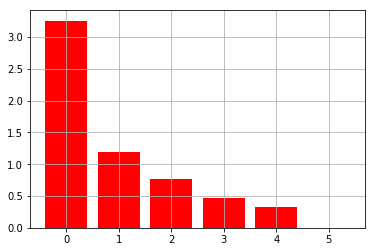

In [0]:
# scaler step
scaler = StandardScaler()
# pca step
pca = PCA()
# pipeline
pipeline = make_pipeline(scaler, pca)
# train pipeline
pipeline.fit(data3)

print('PCA features variance levels: ', pca.explained_variance_)
# plt.bar(range(0,6), pca.explained_variance_)
plt.bar(range(pca.n_components_), pca.explained_variance_, color='red')
plt.grid()
plt.show()


### Second step - dimentionality reduction
For visualization purpose we'll chose n_components=2

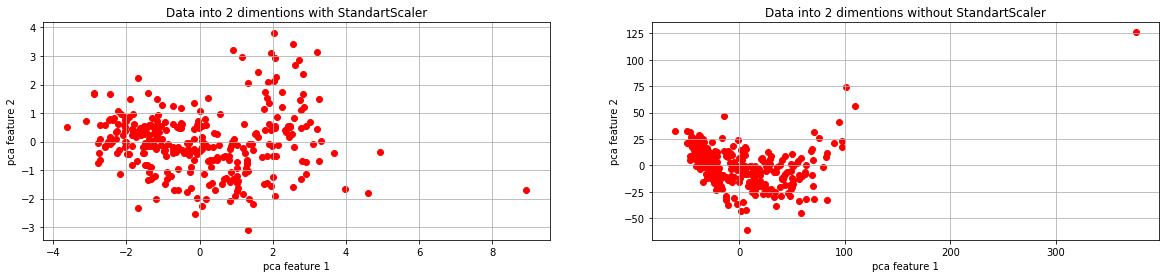

In [0]:
# pca for 2D with scaler
scaler = StandardScaler()
pca_scaler = PCA(n_components=2)
pipeline = make_pipeline(scaler, pca_scaler)
pipeline.fit(data3)
transformed_scaler = pipeline.transform(data3)
x_scaler = transformed_scaler[:, 0]
y_scaler = transformed_scaler[:, 1]

# pca for 2D without scaler
pca = PCA(n_components=2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:, 0]
y = transformed[:, 1]

fig, axs = plt.subplots(1, 2)
axs[0].scatter(x_scaler, y_scaler, c='red')
axs[0].set_xlabel('pca feature 1')
axs[0].set_ylabel('pca feature 2')
axs[0].set_title('Data into 2 dimentions with StandartScaler')
axs[0].grid()

axs[1].scatter(x, y, c='red')
axs[1].set_xlabel('pca feature 1')
axs[1].set_ylabel('pca feature 2')
axs[1].set_title('Data into 2 dimentions without StandartScaler')
axs[1].grid()

fig.set_figwidth(20)
plt.show()
